In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Global2.csv')

In [3]:
df.head()

,Order Date,Segment,Market,Sales,Quantity,Profit
0,31-07-2012,Consumer,US,2309.650,7,762.1845
1,05-02-2013,Corporate,APAC,3709.395,9,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,9,919.9710
3,28-01-2013,Home Office,EU,2892.510,5,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,8,311.5200


In [4]:
df.describe()

,Sales,Quantity,Profit
count,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,28.610982
std,487.565361,2.278766,174.340972
min,0.444000,1.000000,-6599.978000
25%,30.758625,2.000000,0.000000
50%,85.053000,3.000000,9.240000
75%,251.053200,5.000000,36.810000
max,22638.480000,14.000000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 6 columns):
Order Date    51290 non-null object
Segment       51290 non-null object
Market        51290 non-null object
Sales         51290 non-null float64
Quantity      51290 non-null int64
Profit        51290 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 6 columns):
Order Date    51290 non-null datetime64[ns]
Segment       51290 non-null object
Market        51290 non-null object
Sales         51290 non-null float64
Quantity      51290 non-null int64
Profit        51290 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.3+ MB


In [8]:
df.shape

(51290, 6)

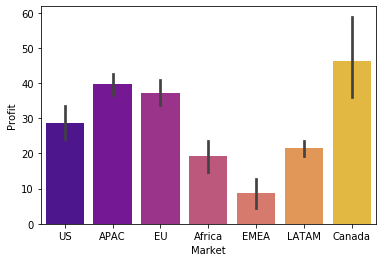

In [9]:
sns.barplot(x ='Market', y ='Profit', data = df, palette ='plasma')

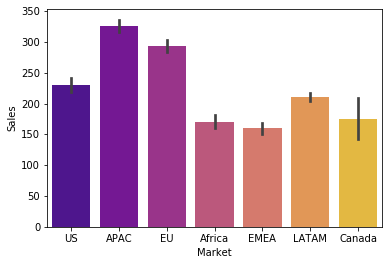

In [10]:
sns.barplot(x ='Market', y ='Sales', data = df, palette ='plasma')

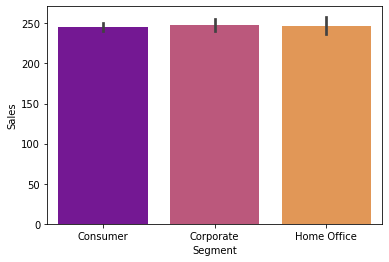

In [11]:
sns.barplot(x ='Segment', y ='Sales', data = df, palette ='plasma')

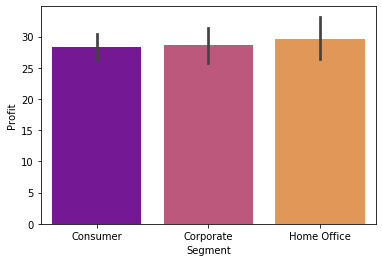

In [12]:
sns.barplot(x ='Segment', y ='Profit', data = df, palette ='plasma')

In [13]:
df["market_segment"] = df["Market"] + df["Segment"]
df.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,market_segment
0,2012-07-31,Consumer,US,2309.650,7,762.1845,USConsumer
1,2013-05-02,Corporate,APAC,3709.395,9,-288.7650,APACCorporate
2,2013-10-17,Consumer,APAC,5175.171,9,919.9710,APACConsumer
3,2013-01-28,Home Office,EU,2892.510,5,-96.5400,EUHome Office
4,2013-05-11,Consumer,Africa,2832.960,8,311.5200,AfricaConsumer


In [14]:
df.describe()

,Sales,Quantity,Profit
count,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,28.610982
std,487.565361,2.278766,174.340972
min,0.444000,1.000000,-6599.978000
25%,30.758625,2.000000,0.000000
50%,85.053000,3.000000,9.240000
75%,251.053200,5.000000,36.810000
max,22638.480000,14.000000,8399.976000


In [15]:
df['ord_year'] = pd.DatetimeIndex(df['Order Date']).year
df['ord_month'] = pd.DatetimeIndex(df['Order Date']).month
df['ord_month'] =  df['ord_month'].map("{:02}".format)

In [16]:
df.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,market_segment,ord_year,ord_month
0,2012-07-31,Consumer,US,2309.650,7,762.1845,USConsumer,2012,07
1,2013-05-02,Corporate,APAC,3709.395,9,-288.7650,APACCorporate,2013,05
2,2013-10-17,Consumer,APAC,5175.171,9,919.9710,APACConsumer,2013,10
3,2013-01-28,Home Office,EU,2892.510,5,-96.5400,EUHome Office,2013,01
4,2013-05-11,Consumer,Africa,2832.960,8,311.5200,AfricaConsumer,2013,05


In [17]:
df['ord_mon'] =  df['ord_year'].astype(str) +'-'+ df['ord_month'].astype(str) 

In [18]:
df.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,market_segment,ord_year,ord_month,ord_mon
0,2012-07-31,Consumer,US,2309.650,7,762.1845,USConsumer,2012,07,2012-07
1,2013-05-02,Corporate,APAC,3709.395,9,-288.7650,APACCorporate,2013,05,2013-05
2,2013-10-17,Consumer,APAC,5175.171,9,919.9710,APACConsumer,2013,10,2013-10
3,2013-01-28,Home Office,EU,2892.510,5,-96.5400,EUHome Office,2013,01,2013-01
4,2013-05-11,Consumer,Africa,2832.960,8,311.5200,AfricaConsumer,2013,05,2013-05


In [19]:
df.nunique()

Order Date         1430
Segment               3
Market                7
Sales             22995
Quantity             14
Profit            24575
market_segment       21
ord_year              4
ord_month            12
ord_mon              48
dtype: int64

In [20]:
df_ag = df.pivot_table(index = 'ord_mon', values ='Profit', columns = 'market_segment', aggfunc = 'sum')

In [21]:
df_ag.shape

(48, 21)

In [22]:
df_ag.head()

market_segment,APACConsumer,APACCorporate,APACHome Office,AfricaConsumer,AfricaCorporate,AfricaHome Office,CanadaConsumer,CanadaCorporate,CanadaHome Office,EMEAConsumer,...,EMEAHome Office,EUConsumer,EUCorporate,EUHome Office,LATAMConsumer,LATAMCorporate,LATAMHome Office,USConsumer,USCorporate,USHome Office
ord_mon,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [23]:
df_ag.nunique()

market_segment
APACConsumer         48
APACCorporate        48
APACHome Office      48
AfricaConsumer       48
AfricaCorporate      48
AfricaHome Office    48
CanadaConsumer       43
CanadaCorporate      39
CanadaHome Office    28
EMEAConsumer         48
EMEACorporate        48
EMEAHome Office      47
EUConsumer           48
EUCorporate          48
EUHome Office        48
LATAMConsumer        48
LATAMCorporate       48
LATAMHome Office     48
USConsumer           48
USCorporate          48
USHome Office        48
dtype: int64

In [24]:
#dropping the null values as they dont have sales on that particular market_segment
df_agg = df_ag.dropna()

In [25]:
df_agg.isnull().sum()

market_segment
APACConsumer         0
APACCorporate        0
APACHome Office      0
AfricaConsumer       0
AfricaCorporate      0
AfricaHome Office    0
CanadaConsumer       0
CanadaCorporate      0
CanadaHome Office    0
EMEAConsumer         0
EMEACorporate        0
EMEAHome Office      0
EUConsumer           0
EUCorporate          0
EUHome Office        0
LATAMConsumer        0
LATAMCorporate       0
LATAMHome Office     0
USConsumer           0
USCorporate          0
USHome Office        0
dtype: int64

In [26]:
voc = (np.std(df_agg)/df_agg.mean()).sort_values(ascending =True)


In [27]:
voc

market_segment
APACCorporate        0.426732
EUConsumer           0.451649
APACConsumer         0.508616
EUCorporate          0.619853
LATAMConsumer        0.688389
USConsumer           0.697860
LATAMHome Office     0.701126
LATAMCorporate       0.780444
EUHome Office        0.836724
USCorporate          0.857088
AfricaConsumer       1.053332
EMEAConsumer         1.070537
CanadaCorporate      1.090791
CanadaConsumer       1.168086
USHome Office        1.234643
APACHome Office      1.357127
AfricaHome Office    1.714297
AfricaCorporate      2.240187
CanadaHome Office    2.294128
EMEAHome Office      2.543984
EMEACorporate        3.893203
dtype: float64

In [28]:
df_apac = df_agg['APACCorporate']

In [29]:
df_apac.columns = 'cum_profit'

In [30]:
df_apac.columns

'cum_profit'

In [31]:
df_apac.head()

ord_mon
2011-02    3600.7776
2011-06    4550.5506
2011-09    2040.2007
2012-04    1888.6710
2012-06    3134.9796
Name: APACCorporate, dtype: float64

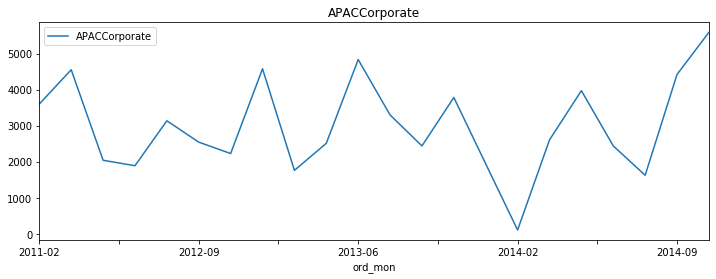

In [32]:
df_apac.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APACCorporate')
plt.show(block=False)

In [33]:
df_apac.head()

ord_mon
2011-02    3600.7776
2011-06    4550.5506
2011-09    2040.2007
2012-04    1888.6710
2012-06    3134.9796
Name: APACCorporate, dtype: float64

In [36]:
df_apac.shape

(22,)

In [37]:
type(df_apac)

pandas.core.series.Series

In [45]:
data = df_apac.to_frame()
data

,APACCorporate
ord_mon,
2011-02,3600.7776
2011-06,4550.5506
2011-09,2040.2007
2012-04,1888.6710
2012-06,3134.9796
2012-09,2542.6422
2012-12,2226.2160
2013-01,4578.2238
2013-03,1760.0946


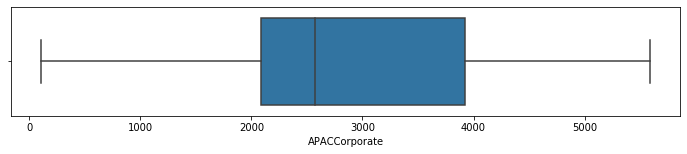

In [46]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['APACCorporate'],whis=1.5)

In [47]:
train_len = 18
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] 

### ADF Test

In [50]:

from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(data['APACCorporate'])
print('ADF statitistic: %f '%adf_test[0])
print("Critical value @ 0.05: %.2f"%adf_test[4]['5%'])
print('P-Value: %f' %adf_test[1])

ADF statitistic: -3.733760 
Critical value @ 0.05: -3.15
P-Value: 0.003663


### KPSS test

In [51]:
from statsmodels.tsa.stattools import kpss
kpss_test=kpss(data['APACCorporate'])
print('kpss statitistic: %f '%kpss_test[0])
print("Critical value @ 0.05: %.2f"%kpss_test[3]['5%'])
print('P-Value: %f' %kpss_test[1])

kpss statitistic: 0.269081 
Critical value @ 0.05: 0.46
P-Value: 0.100000


### Boxcox Transformation

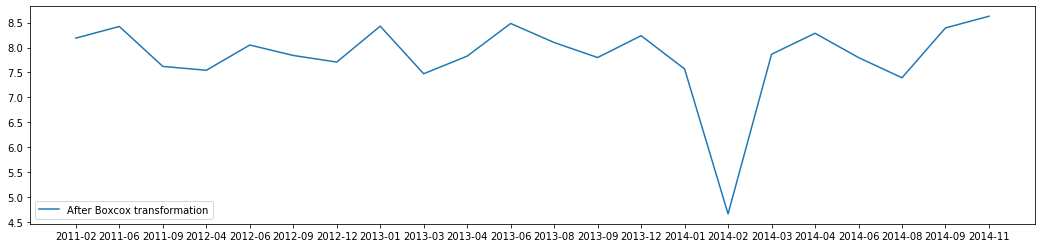

In [56]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['APACCorporate'],lmbda=0),index=data.index)
plt.figure(figsize=(18,4))
plt.plot(data_boxcox,label='After Boxcox transformation')
plt.legend(loc='best')
plt.show()

### Differencing


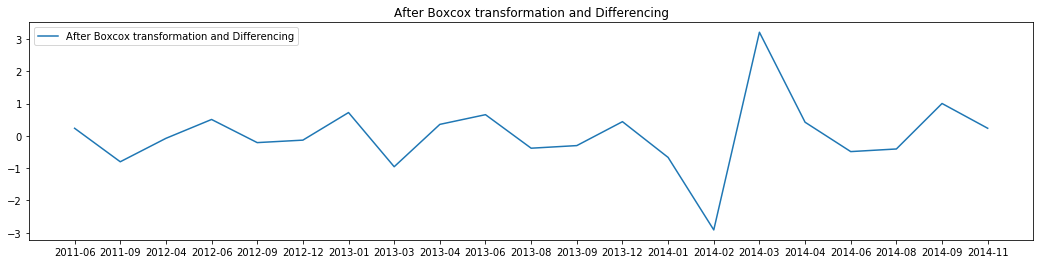

In [58]:
data_boxcox_diff=pd.Series(data_boxcox-data_boxcox.shift(),index=data.index)
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(18,4))
plt.plot(data_boxcox_diff,label='After Boxcox transformation and Differencing')
plt.legend(loc='best')
plt.title("After Boxcox transformation and Differencing")
plt.show()

### Autocorrelation function (ACF) plot


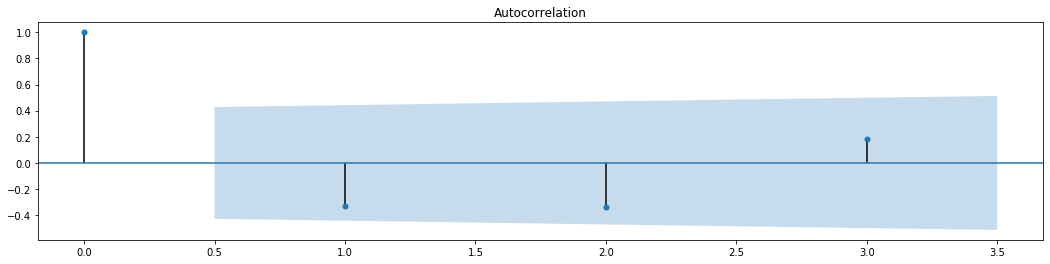

In [60]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(18,4))
plot_acf(data_boxcox_diff,ax=plt.gca(),lags=3)
plt.show()

### Partial Autocorrelation function (PACF) plot


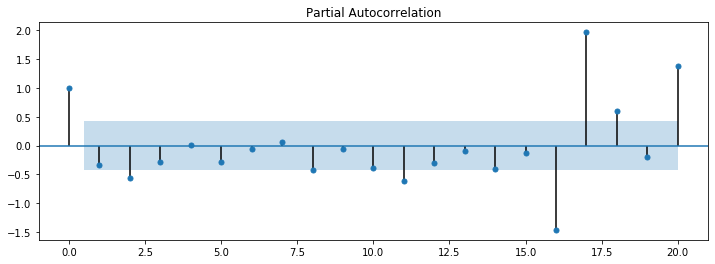

In [61]:

from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff,ax=plt.gca(),lags=30)
plt.show()

### Split into train and test data sets


In [63]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [65]:
### Auto Regression Method (AR)

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff,order = (1,0,0))
model_fit=model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   17
Model:                     ARMA(1, 0)   Log Likelihood                 -25.636
Method:                       css-mle   S.D. of innovations              1.090
Date:                Sat, 15 Aug 2020   AIC                             57.273
Time:                        10:52:39   BIC                             59.772
Sample:                             0   HQIC                            57.521
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0038      0.203     -0.019      0.985      -0.401       0.393
ar.L1.y       -0.3235      0.222     -1.460      0.165      -0.758       0.111
                                    Roots           

### Recover original time series forecast

In [69]:
# y_hat_ar = data_boxcox_diff.copy()
# y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
# y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()

# y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
# y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])




# y_hat_ar['ar_forecast_boxcox_diff']

KeyError: 'ar_forecast'

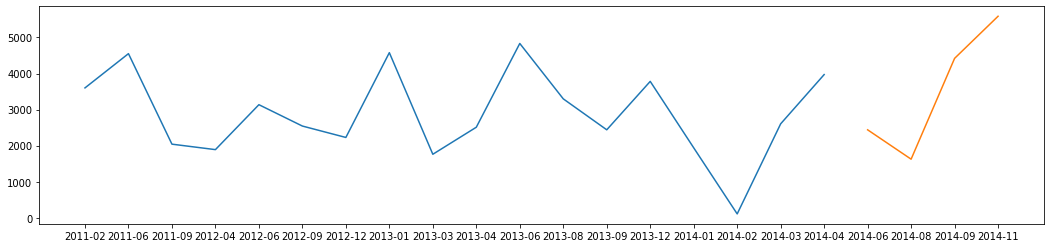

In [70]:
plt.figure(figsize=(18,4))
plt.plot( train['APACCorporate'], label='Train')
plt.plot(test['APACCorporate'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto Regression Method')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [72]:
### Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['APACCorporate'],y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['APACCorporate']-y_hat_ar['ar_forecast'][test.index.min():])/test['APACCorporate'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
tempResults

NameError: name 'mean_squared_error' is not defined

In [ ]:
### Moving Average Method (MA)

model = ARIMA(train_data_boxcox_diff,order = (0,0,3))
model_fit=model.fit()
print(model_fit.params)

### Recover original time series forecast

y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] =y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train,test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Auto Regression  Moving Method')
plt.legend(loc='best')
plt.title('Auto Regression Moving Method')
plt.show()

### Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['APACCorporate'],y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['APACCorporate']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Auto Regressive Moving (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### Auto Regressive Moving Average Method (ARMA)

model = ARIMA(train_data_boxcox_diff,order = (4,0,3))
model_fit=model.fit()
print(model_fit.params)

### Recover original time series forecast

y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum() 
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train,test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['APACCorporate'], label='Train')
plt.plot(test['APACCorporate'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='Auto Regressive Moving Average Method(ARMA)')
plt.legend(loc='best')
plt.title('Auto Regressive Moving Average Method(ARMA)')
plt.show()

### Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['APACCorporate'],y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['APACCorporate']-y_hat_arma['arma_forecast'][test.index.min():])/test['APACCorporate'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive Moving Average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### Auto Regressive Integrated  Moving Average Method (ARIMA)

model = ARIMA(train_data_boxcox,order = (4,1,3))
model_fit=model.fit()
print(model_fit.params)

### Recover original time series forecast

y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum() 
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train,test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['APACCorporate'], label='Train')
plt.plot(test['APACCorporate'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='Auto Regressive Integrated Moving Average Method(ARIMA)')
plt.legend(loc='best')
plt.title('Auto Regressive Integrated Moving Average Method(ARIMA)')
plt.show()

### Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['APACCorporate'],y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['APACCorporate']-y_hat_arima['arima_forecast'][test.index.min():])/test['APACCorporate'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive Integrated Moving Average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### Seasonal Auto Regressive Integrated Moving Average(SARIMA)

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox,order = (7,2,9),seasonal_order = (3,1,1,12))
model_fit=model.fit()
print(model_fit.params)

### Recover original time series forecast

y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train,test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['APACCorporate'], label='Train')
plt.plot(test['APACCorporate'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label=' Seasonal Auto Regressive Integrated Moving Average Method(SARIMA)')
plt.legend(loc='best')
plt.title('Seasonal Auto Regressive Integrated Moving Average Method(SARIMA)')
plt.show()

### Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['APACCorporate'],y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['APACCorporate']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['APACCorporate'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal Auto Regressive Integrated Moving Average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results